# importing packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# loading training dataset

In [2]:
df_train = pd.read_csv("./train.csv")

### checking out dataset

In [3]:
df_train.sample(10)
# a sample view of data set

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1062  1063         190       RM         85.0    13600   Pave  Grvl      Reg   
1220  1221          20       RL         66.0     7800   Pave   NaN      IR1   
1135  1136          30       RM         60.0     6180   Pave   NaN      Reg   
1141  1142          60       RL          NaN    10304   Pave   NaN      IR1   
846    847          60       RL         75.0     9317   Pave   NaN      Reg   
834    835          20       RL         75.0     7875   Pave   NaN      Reg   
1452  1453         180       RM         35.0     3675   Pave   NaN      Reg   
688    689          20       RL         60.0     8089   Pave   NaN      Reg   
344    345         160       RM         36.0     2592   Pave   NaN      Reg   
261    262          60       RL         69.0     9588   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
1062         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
1220         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
1135         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
1141         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
846          Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
834          Lvl    AllPub  ...        0    NaN  GdWo         NaN       0   
1452         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
688          HLS    AllPub  ...        0    NaN   NaN         NaN       0   
344          Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
261          Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1062      9   2007        WD         Normal      90000  
1220     11   2006        WD        Abnorml     115000  
1135      5   2007        WD         Normal     102000  
1141     10   2009        WD         Normal     197500  
846       7   2009        WD         Normal     213000  
834       9   2008        WD         Normal     139950  
1452      5   2006        WD         Normal     145000  
688      10   2007       New        Partial     392000  
344       4   2010        WD         Normal      85000  
261      11   2007       New        Partial     276000  

[10 rows x 81 columns]

In [4]:
df_train.columns
#gets names of all the variables (features of house)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df_train.dtypes
#checking the dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


# Exploratory Data Analysis

In [8]:
df_train['SalePrice'].describe()
#taking a look at the SalesPrice

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74160.16474519415, 180921.19589041095, 0.9319665641512986))

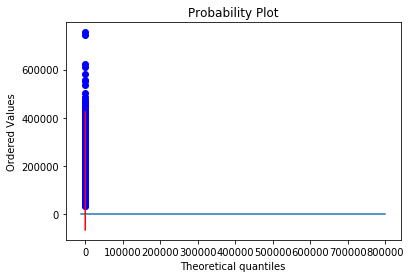

In [11]:
sns.distplot(df_train['SalePrice'])
print(f"Skewness: {df_train['SalePrice'].skew()}")
print(f"Kurtosis: {df_train['SalePrice'].kurt()}")
#use sns to plot a better looking plot

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74160.16474519415, 180921.19589041095, 0.9319665641512986))

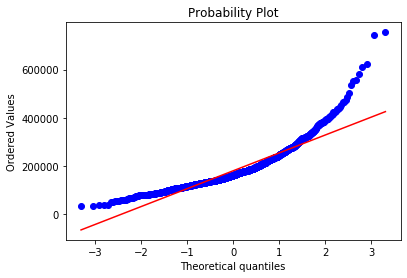

In [13]:
stats.probplot(df_train['SalePrice'], plot=plt)
#probability plotdf_train['log_SalePrice'] = np.log(df_train['SalePrice'])


In [14]:
df_train['log_SalePrice'] = np.log(df_train['SalePrice'])
#add a new column for log_SalePrice


Skewness: 0.12133506220520406
Kurtosis: 0.8095319958036296


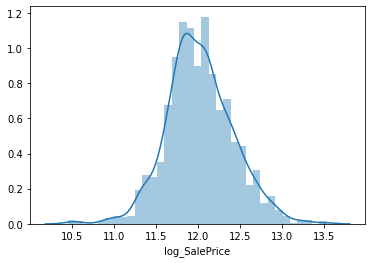

In [15]:
sns.distplot(df_train['log_SalePrice'])
print(f"Skewness: {df_train['log_SalePrice'].skew()}")
print(f"Kurtosis: {df_train['log_SalePrice'].kurt()}")
#plot the log_sales to make a less skew, more normal
      

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([2.3475816 , 2.34870024, 2.35543428, ..., 2.59117977, 2.60425435,
         2.60523999])),
 (0.033117636670830904, 2.4863577612745598, 0.9954555553527912))

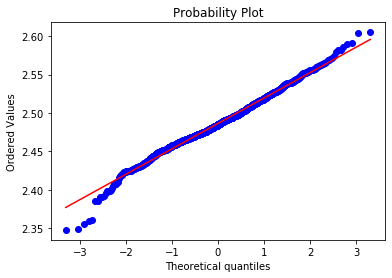

In [16]:
stats.probplot(np.log(df_train['log_SalePrice']), plot=plt)
#log_SalePrice gives more normal distribution compare to SalePrice


In [17]:
df_train.corr().abs().sort_values('SalePrice', ascending=False)
#checking the numerical corr


Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
SalePrice      0.021917    0.084284     0.351799  0.263843     0.790982   
log_SalePrice  0.017942    0.073959     0.355878  0.257320     0.817184   
OverallQual    0.028365    0.032628     0.251646  0.105806     1.000000   
GrLivArea      0.008273    0.074853     0.402797  0.263116     0.593007   
GarageCars     0.016570    0.040110     0.285691  0.154871     0.600671   
GarageArea     0.017634    0.098672     0.344997  0.180403     0.562022   
TotalBsmtSF    0.015415    0.238518     0.392075  0.260833     0.537808   
1stFlrSF       0.010496    0.251758     0.457181  0.299475     0.476224   
FullBath       0.005587    0.131608     0.198769  0.126031     0.550600   
TotRmsAbvGrd   0.027239    0.040380     0.352096  0.190015     0.427452   
YearBuilt      0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd   0.021998    0.040581     0.088866  0.013788     0.550684   
GarageYrBlt    0.000072    0.085072     0.070250  0.024947     0.547766   
MasVnrArea     0.050298    0.022936     0.193458  0.104160     0.411876   
Fireplaces     0.019772    0.045569     0.266639  0.271364     0.396765   
BsmtFinSF1     0.005024    0.069836     0.233633  0.214103     0.239666   
LotFrontage    0.010601    0.386347     1.000000  0.426095     0.251646   
WoodDeckSF     0.029643    0.012579     0.088521  0.171698     0.238923   
2ndFlrSF       0.005590    0.307886     0.080177  0.050986     0.295493   
OpenPorchSF    0.000477    0.006100     0.151972  0.084774     0.308819   
HalfBath       0.006784    0.177354     0.053532  0.014259     0.273458   
LotArea        0.033226    0.139781     0.426095  1.000000     0.105806   
BsmtFullBath   0.002289    0.003491     0.100949  0.158155     0.111098   
BsmtUnfSF      0.007940    0.140759     0.132644  0.002618     0.308159   
BedroomAbvGr   0.037719    0.023438     0.263170  0.119690     0.101676   
KitchenAbvGr   0.002951    0.281721     0.006069  0.017784     0.183882   
EnclosedPorch  0.002889    0.012037     0.010700  0.018340     0.113937   
ScreenPorch    0.001330    0.026030     0.041383  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.206167  0.077672     0.065166   
MSSubClass     0.011156    1.000000     0.386347  0.139781     0.032628   
OverallCond    0.012609    0.059316     0.059213  0.005636     0.091932   
MoSold         0.021172    0.013585     0.011200  0.001205     0.070815   
3SsnPorch      0.046635    0.043825     0.070029  0.020423     0.030371   
YrSold         0.000712    0.021407     0.007450  0.014261     0.027347   
LowQualFinSF   0.044230    0.046474     0.038469  0.004779     0.030429   
Id             1.000000    0.011156     0.010601  0.033226     0.028365   
MiscVal        0.006242    0.007683     0.003368  0.038068     0.031406   
BsmtHalfBath   0.020155    0.002333     0.007234  0.048046     0.040150   
BsmtFinSF2     0.005968    0.065649     0.049900  0.111170     0.059119   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
SalePrice         0.077856   0.522897      0.507101    0.477493    0.386420   
log_SalePrice     0.036868   0.586570      0.565608    0.430809    0.372023   
OverallQual       0.091932   0.572323      0.550684    0.411876    0.239666   
GrLivArea         0.079686   0.199010      0.287389    0.390857    0.208171   
GarageCars        0.185758   0.537850      0.420622    0.364204    0.224054   
GarageArea        0.151521   0.478954      0.371600    0.373066    0.296970   
TotalBsmtSF       0.171098   0.391452      0.291066    0.363936    0.522396   
1stFlrSF          0.144203   0.281986      0.240379    0.344501    0.445863   
FullBath          0.194149   0.468271      0.439046    0.276833    0.058543   
TotRmsAbvGrd      0.057583   0.095589      0.191740    0.280682    0.044316   
YearBuilt         0.375983   1.000000      0.592855    0.315707    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.179618    0.128

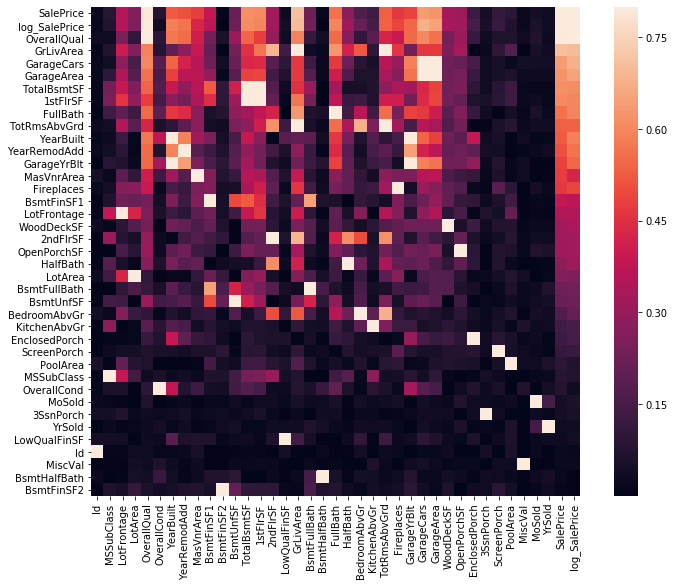

In [18]:
corrmat = df_train.corr().abs().sort_values('SalePrice', ascending=False)
f, ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat, vmax=0.8, square=True)

#heatmap of the numerical correlation


In [19]:
df_train['MSSubClass'] = df_train['MSSubClass'].astype('object')
#convert MSSubclass into object type

#Filling isnull with Missing or None
df_train['LotFrontage'] = df_train['LotFrontage'].fillna('Missing')

df_train['Alley'] = df_train['Alley'].fillna('Missing')

df_train['MasVnrType'] = df_train['MasVnrType'].fillna('Missing')


#Convert Conditions or Quality to numerical values
qual_dic = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2,'Po': 1, 'Av':3, 'Mn':2,'No':1}

df_train['ExterQual'].replace(qual_dic, inplace=True)

df_train['ExterCond'].replace(qual_dic, inplace=True)

df_train['BsmtQual'].replace(qual_dic, inplace=True)
df_train['BsmtQual'] = df_train['BsmtQual'].fillna(0)

df_train['BsmtCond'].replace(qual_dic, inplace=True)
df_train['BsmtCond'] = df_train['BsmtCond'].fillna(0)

bst_qual_dic = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3,'LwQ': 2, 'Unf':1}

df_train['BsmtFinType1'].replace(bst_qual_dic, inplace=True)
df_train['BsmtFinType1'] = df_train['BsmtFinType1'].fillna(0)

df_train['BsmtFinType2'].replace(bst_qual_dic, inplace=True)
df_train['BsmtFinType2'] = df_train['BsmtFinType2'].fillna(0)

df_train['HeatingQC'].replace(qual_dic, inplace=True)
df_train['HeatingQC'] = df_train['HeatingQC'].fillna('Missing')

air_dic = {'Y': 1, 'N': 0}
df_train['CentralAir'].replace(air_dic, inplace=True)
df_train['CentralAir'] = df_train['CentralAir'].fillna('Missing')

df_train['KitchenQual'].replace(qual_dic, inplace=True)
df_train['KitchenQual'] = df_train['KitchenQual'].fillna('Missing')

df_train['FireplaceQu'].replace(qual_dic, inplace=True)
df_train['FireplaceQu'] = df_train['FireplaceQu'].fillna(0)

gar_fin_dic = {'Fin': 3, 'RFn': 2,'Unf': 1}
df_train['GarageFinish'].replace(gar_fin_dic, inplace=True)
df_train['GarageFinish'] = df_train['GarageFinish'].fillna(0)

df_train['GarageQual'].replace(qual_dic, inplace=True)
df_train['GarageQual'] = df_train['GarageQual'].fillna(0)

df_train['GarageCond'].replace(qual_dic, inplace=True)
df_train['GarageCond'] = df_train['GarageCond'].fillna(0)

df_train['PoolQC'].replace(qual_dic, inplace=True)
df_train['PoolQC'] = df_train['PoolQC'].fillna(0)


fench_dic = {'GdPrv': 4, 'MnPrv': 3,'GdWo': 2, 'MnWw': 1}
df_train['Fence'].replace(fench_dic, inplace=True)
df_train['Fence'] = df_train['Fence'].fillna(0)



Id MSSubClass MSZoning LotFrontage  LotArea Street    Alley LotShape  \
160    161         20       RL     Missing    11120   Pave  Missing      IR1   
1096  1097         70       RM          60     6882   Pave  Missing      Reg   
1403  1404         20       RL          49    15256   Pave  Missing      IR1   
543    544        120       RH          34     4058   Pave  Missing      Reg   
966    967         50       RL         130     9600   Pave  Missing      IR1   
994    995         20       RL          96    12456   Pave  Missing      Reg   
1415  1416        120       RL          51     3635   Pave  Missing      Reg   
413    414         30       RM          56     8960   Pave     Grvl      Reg   
1247  1248         80       RL     Missing    12328   Pave  Missing      IR1   
179    180         30       RM          60     8520   Pave  Missing      Reg   

     LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold  \
160          Lvl    AllPub  ...      0   0.0         NaN       0      6   
1096         Lvl    AllPub  ...      0   0.0         NaN       0      3   
1403         Lvl    AllPub  ...      0   0.0         NaN       0      8   
543          Lvl    AllPub  ...      0   0.0         NaN       0      6   
966          HLS    AllPub  ...      0   0.0         NaN       0      6   
994          Lvl    AllPub  ...      0   0.0         NaN       0      7   
1415         Lvl    AllPub  ...      0   0.0         NaN       0      5   
413          Lvl    AllPub  ...      0   0.0         NaN       0      3   
1247         Lvl    AllPub  ...      0   0.0         NaN       0      5   
179          Lvl    AllPub  ...      0   0.0         NaN       0      7   

     YrSold SaleType  SaleCondition  SalePrice  log_SalePrice  
160    2008       WD         Normal     162500      11.998433  
1096   2007       WD         Normal     127000      11.751942  
1403   2007       WD         Normal     282922      12.552927  
543    2007       WD         Normal     133000      11.798104  
966    2009       WD         Normal     160000      11.982929  
994    2009       WD         Normal     337500      12.729321  
1415   2009       WD         Normal     175900      12.077671  
413    2010       WD         Normal     115000      11.652687  
1247   2010       WD         Normal     169900      12.042965  
179    2007       WD         Normal     100000      11.512925  

[10 rows x 82 columns]

In [21]:
total_missing = df_train.isnull().sum().sort_values(ascending=False)
percent_missing = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)*100
missing_values = pd.concat([total_missing, percent_missing], axis=1, keys=['Total','Percent'])
missing_values.head(20)
#gives a table of the total missing values and the percent


Total    Percent
MiscFeature     1406  96.301370
GarageType        81   5.547945
GarageYrBlt       81   5.547945
BsmtExposure      38   2.602740
MasVnrArea         8   0.547945
Electrical         1   0.068493
ExterQual          0   0.000000
YearRemodAdd       0   0.000000
RoofStyle          0   0.000000
RoofMatl           0   0.000000
Exterior1st        0   0.000000
Exterior2nd        0   0.000000
MasVnrType         0   0.000000
log_SalePrice      0   0.000000
ExterCond          0   0.000000
BsmtQual           0   0.000000
BsmtCond           0   0.000000
BsmtFinType1       0   0.000000
BsmtFinSF1         0   0.000000
BsmtFinType2       0   0.000000

In [33]:
df_train_cleaned = df_train.fillna(0)
#fill the missing with NA because NaN means the houses do not have these features

## feature engineering/column removal

In [34]:
#can I drop the basement bath and half baths?
# feature engineered bath into 1 bathroom number to include both full and half baths
df_train_cleaned['TotalBath'] = df_train_cleaned['FullBath']+0.5*df_train_cleaned['BsmtFullBath']+df_train_cleaned['HalfBath']+0.5*df_train_cleaned['BsmtHalfBath']
df_train_cleaned = df_train_cleaned.drop(columns=['FullBath','BsmtFullBath','HalfBath', 'BsmtHalfBath'])



df_train_cleaned['TotalPorch'] = df_train_cleaned['WoodDeckSF']+df_train_cleaned['OpenPorchSF']+df_train_cleaned['EnclosedPorch']+df_train_cleaned['3SsnPorch']+df_train_cleaned['ScreenPorch']
df_train_cleaned = df_train_cleaned.drop(columns=['WoodDeckSF','OpenPorchSF','EnclosedPorch', '3SsnPorch','ScreenPorch',])


In [35]:
#TotalBsmtSF = BsmtFinSF1+BsmtFinSF2+BsmtUnfSF #drop
#GrLivArea = 1stFlrSF+2ndFlrSF+LowQualFinSF #drop
df_train_cleaned = df_train_cleaned.drop(columns=['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','1stFlrSF', '2ndFlrSF', 'LowQualFinSF'])


#GarageArea has high corr with GarageCars
df_train_cleaned = df_train_cleaned.drop(columns=['GarageArea'])


#data already contains in TotRmsAbvGrd
df_train_cleaned = df_train_cleaned.drop(columns=['BedroomAbvGr','KitchenAbvGr'])

#other columns
df_train_cleaned = df_train_cleaned.drop(columns=['Alley','Utilities'])



In [36]:
df_train_cleaned.shape

(1460, 64)

In [37]:
df_train_cleaned.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'GrLivArea', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition', 'SalePrice', 'log_SalePrice',
       'TotalBath', 'TotalPorch'],
      dtype='object')

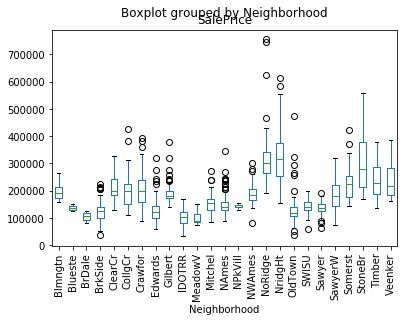

In [38]:
df_train_cleaned.boxplot(by='Neighborhood', column=['SalePrice'], grid=False, rot=90)


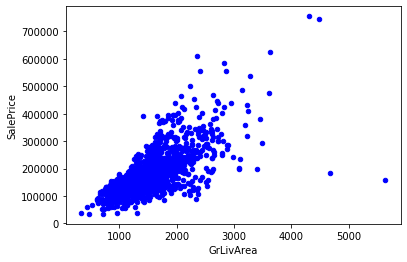

In [39]:
df_train_cleaned.plot.scatter(x = 'GrLivArea',
                          y = 'SalePrice',
                             c='Blue')

In [40]:
#above shows 4 data points that extremes, we will remove the bottom right 2, and keep the top left 2 since they seems to be following the trend
df_train_cleaned.loc[df_train_cleaned['GrLivArea']>4000]
df_train_cleaned = df_train_cleaned.drop(df_train_cleaned[df_train_cleaned['Id']==524].index)
df_train_cleaned = df_train_cleaned.drop(df_train_cleaned[df_train_cleaned['Id']==1299].index)
df_train_cleaned.loc[df_train_cleaned['GrLivArea']>4000]
#checking to see the 2 rows are removed



Id  MSSubClass MSZoning LotFrontage  LotArea Street LotShape  \
691    692          60       RL         104    21535   Pave      IR1   
1182  1183          60       RL         160    15623   Pave      IR1   

     LandContour LotConfig LandSlope  ... MiscFeature MiscVal MoSold YrSold  \
691          Lvl    Corner       Gtl  ...           0       0      1   2007   
1182         Lvl    Corner       Gtl  ...           0       0      7   2007   

     SaleType  SaleCondition  SalePrice  log_SalePrice  TotalBath TotalPorch  
691        WD         Normal     755000      13.534473        4.5        432  
1182       WD        Abnorml     745000      13.521139        4.5        249  

[2 rows x 64 columns]

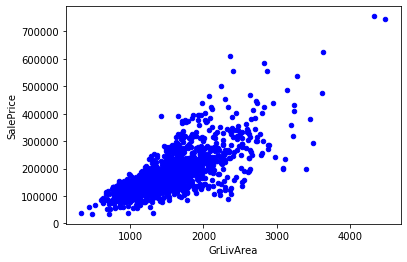

In [41]:
df_train_cleaned.plot.scatter(x = 'GrLivArea',
                          y = 'SalePrice',
                             c='Blue')

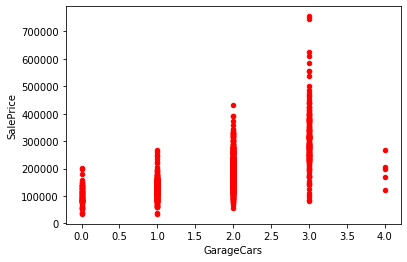

In [42]:
df_train_cleaned.plot.scatter(x = 'GarageCars',
                          y = 'SalePrice',
                             c='Red')

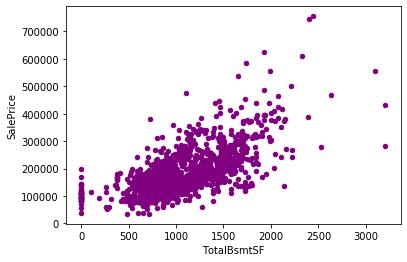

In [43]:
df_train_cleaned.plot.scatter(x = 'TotalBsmtSF',
                          y = 'SalePrice',
                             c='Purple')

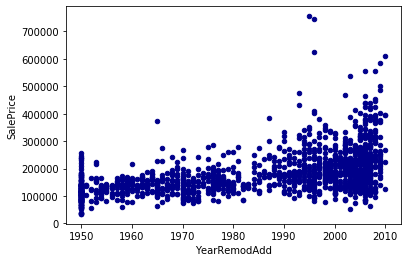

In [44]:
df_train_cleaned.plot.scatter(x = 'YearRemodAdd',
                          y = 'SalePrice',
                             c='DarkBlue')

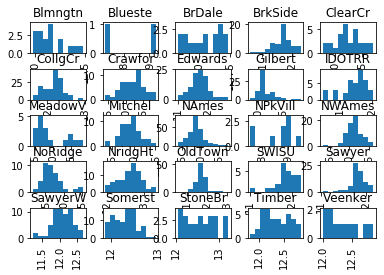

In [45]:
df_train_cleaned['log_SalePrice'].hist(by=df_train_cleaned['Neighborhood'])
plt.show()

In [46]:
df_object_only = df_train_cleaned.select_dtypes(include='object')

In [47]:
df_object_only.columns

Index(['MSZoning', 'LotFrontage', 'Street', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure', 'Heating',
       'Electrical', 'Functional', 'GarageType', 'PavedDrive', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [48]:
df_train_dum =  pd.get_dummies(df_train_cleaned)

In [50]:
df_train_dum.shape

(1458, 335)

In [51]:
df_train_dum.to_csv('training_set_dum.csv')

In [52]:
df_train_cleaned.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'GrLivArea', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition', 'SalePrice', 'log_SalePrice',
       'TotalBath', 'TotalPorch'],
      dtype='object')